<a href="https://colab.research.google.com/github/CyberBantu/Analise_votos_eleicoes_regiaometropoliana_RJ_2022/blob/main/votos_RM_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analise de votos da Região Metropolitana do Rio de Janerio - 2022 - Primeiro Turno

In [1]:
## No drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando Bases

In [3]:
candidatos = pd.read_csv('/content/drive/MyDrive/analise_votos/consulta_cand_2022_RJ.csv', sep = ';', encoding='latin1')

In [4]:
# Verificando candidatos
candidatos

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6005859720226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6030481220226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,N
2,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6006526220226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6008301120226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,N
4,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6010397720226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6029190720226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2781,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6017420820226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2782,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6027285920226190000,2,DEFERIDO,4,INDEFERIDO COM RECURSO,SIM,Válido,2,Deferido,S
2783,24/10/2022,12:07:44,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6029182220226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


In [5]:
votos = pd.read_csv('/content/drive/MyDrive/analise_votos/votacao_secao_2022_RJ.csv', sep = ';', encoding='latin1', na_filter=False)

In [6]:
votos['CD_MUNICIPIO'].unique()

array([60011, 58777, 58335, 58696, 58572, 58394, 58815, 58076, 58637,
       59250, 58190, 58270, 58971, 58378, 58670, 58939, 58092, 58467,
       58017, 58351, 58653, 58491, 58289, 58432, 58173, 58262, 58530,
       58599, 58998, 58955, 59110, 58327, 58475, 58033, 59315, 59013,
       58831, 58009, 59234, 59277, 58386, 58122, 58114, 59196, 58750,
       58106, 58424, 58041, 58181, 58130, 59218, 58610, 59153, 58157,
       58254, 59030, 58734, 58874, 58149, 59056, 58203, 58050, 58068,
       59099, 58513, 58246, 58084, 58408, 59293, 58556, 58416, 58912,
       58718, 58793, 58858, 58220, 58165, 59170, 59072, 59331, 58440,
       58459, 58238, 58297, 58360, 58343, 58211, 58319, 58300, 59137,
       58890, 58025])

##### Filtrando e Juntando as bases

In [7]:
votos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO'],
      dtype='object')

In [8]:
votos = votos[['SQ_CANDIDATO','NM_VOTAVEL',
       'NM_TIPO_ELEICAO',
       'TP_ABRANGENCIA','CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO',
       'NM_VOTAVEL', 'QT_VOTOS']]
votos.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO',
       'NM_VOTAVEL', 'QT_VOTOS'],
      dtype='object')

In [9]:
# Olhando para a coluna novamente
votos.head(
)

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NM_VOTAVEL,QT_VOTOS
0,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,234,62,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,11
1,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58777,PETRÓPOLIS,65,407,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,1
2,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58335,DUQUE DE CAXIAS,78,239,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,7
3,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58696,NOVA IGUAÇU,156,104,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,9
4,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58572,MIGUEL PEREIRA,48,38,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,12


In [10]:
# olhando para informações dos candidatos
candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

In [11]:
candidatos = candidatos[[ 'DS_CARGO',
       'SQ_CANDIDATO', 'NM_CANDIDATO', 'DS_SITUACAO_CANDIDATURA',
       'SG_PARTIDO',
       'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO']]

candidatos.head()

,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
0,DEPUTADO ESTADUAL,190001596749,CARLA MAYARA TORRES,APTO,PL,32,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),PARDA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",1270629.01,N
1,DEPUTADO FEDERAL,190001714793,CLAUDIO FELIPE DE SÁ,APTO,DC,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PRETA,OUTROS,3176572.53,N
2,DEPUTADO FEDERAL,190001598405,ABRAÃO RAMOS PEREIRA BRAZ,APTO,NOVO,30,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,ADVOGADO,3176572.53,N
3,DEPUTADO ESTADUAL,190001601396,NEY JOSÉ RODRIGUES MACHADO,APTO,SOLIDARIEDADE,52,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,OUTROS,1270629.01,N
4,DEPUTADO FEDERAL,190001603427,RENATA MAGALHÃES TURQUES ARAÚJO,APTO,PSD,48,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,3176572.53,N


In [12]:
# Juntando as bases de dados com o merge
base = pd.merge(votos, candidatos, on = 'SQ_CANDIDATO', how = 'left')

In [13]:
# Verificando as colunas da base
base.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO_x',
       'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO_y', 'NM_CANDIDATO',
       'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO'],
      dtype='object')

##### Filtrar dados para os municipios da região metropolitana

In [14]:
base['NM_MUNICIPIO'].unique()

array(['RIO DE JANEIRO', 'PETRÓPOLIS', 'DUQUE DE CAXIAS', 'NOVA IGUAÇU',
       'MIGUEL PEREIRA', 'ITAGUAÍ', 'PORCIÚNCULA', 'BARRA MANSA',
       'NILÓPOLIS', 'VOLTA REDONDA', 'CAMPOS DOS GOYTACAZES',
       'CONCEIÇÃO DE MACABU', 'SÃO GONÇALO', 'ITABORAÍ', 'NOVA FRIBURGO',
       'SANTO ANTÔNIO DE PÁDUA', 'BOM JARDIM', 'MESQUITA',
       'ANGRA DOS REIS', 'ENGENHEIRO PAULO DE FRONTIN', 'NITERÓI', 'MAGÉ',
       'SÃO FRANCISCO DE ITABAPOANA', 'ITAPERUNA', 'CAMBUCI',
       'IGUABA GRANDE', 'MARICÁ', 'MIRACEMA', 'SÃO JOÃO DA BARRA',
       'SÃO FIDÉLIS', 'SILVA JARDIM', 'PORTO REAL', 'MACAÉ', 'ARARUAMA',
       'PATY DO ALFERES', 'SÃO JOÃO DE MERITI', 'RESENDE', 'QUISSAMÃ',
       'VASSOURAS', 'ARRAIAL DO CABO', 'MACUCO', 'QUEIMADOS',
       'BOM JESUS DO ITABAPOANA', 'TRÊS RIOS', 'PARATY', 'GUAPIMIRIM',
       'SEROPÉDICA', 'BELFORD ROXO', 'APERIBÉ', 'CABO FRIO', 'VALENÇA',
       'NATIVIDADE', 'TERESÓPOLIS', 'CACHOEIRAS DE MACACU',
       'CASIMIRO DE ABREU', 'SÃO PEDRO DA ALDEIA', 'P

In [15]:
base.shape


(6838270, 23)

In [16]:
rm = base.query("NM_MUNICIPIO == ('RIO DE JANEIRO', 'PETRÓPOLIS', 'DUQUE DE CAXIAS', 'NOVA IGUAÇU', 'ITAGUAÍ','NILÓPOLIS','SÃO GONÇALO', 'ITABORAÍ', 'MESQUITA','NITERÓI', 'MAGÉ','MARICÁ', 'SÃO JOÃO DE MERITI', 'QUEIMADOS','GUAPIMIRIM','SEROPÉDICA', 'BELFORD ROXO', 'CACHOEIRAS DE MACACU','JAPERI', 'PARACAMBI','RIO BONITO', 'TANGUÁ')")

In [17]:
rm.shape

(5317328, 23)

##### Votos por cor

In [18]:
# contando primeiro os votos
cor_geral = rm['DS_COR_RACA'].value_counts(dropna = False).reset_index()
cor_geral.rename(columns={'index': 'cor'}, inplace = True) # renomeando a coluna
cor_geral['porcent'] = round(cor_geral['DS_COR_RACA'] / cor_geral['DS_COR_RACA'].sum()*100,2)


Porcentagem de votos no Geral contado governador

In [19]:
cor_geral

,cor,DS_COR_RACA,porcent
0,BRANCA,3022102,56.83
1,PARDA,877153,16.50
2,PRETA,736958,13.86
3,NaN,530353,9.97
4,NÃO INFORMADO,98619,1.85
5,INDÍGENA,30728,0.58
6,AMARELA,21415,0.40


### Filtrando dados, sem governador e Senador, apenas Proporcionais ---> DEp FED e DEP EST

In [20]:
# Observando valores unicos para cargo
rm['DS_CARGO_x'].unique()

array(['GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL'],
      dtype=object)

In [21]:
# Filtrando
votos_proporcionais = rm.query("DS_CARGO_x == ('DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL')")
votos_proporcionais.head()

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO_x,NM_VOTAVEL,...,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
569685,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,7,479,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569687,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,245,277,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569688,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,169,171,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569689,190001605600,ROSIMAR DA SILVA FERRAZ MEDEIROS,ELEIÇÃO ORDINÁRIA,E,58718,PARACAMBI,70,1,DEPUTADO FEDERAL,ROSIMAR DA SILVA FERRAZ MEDEIROS,...,APTO,PP,61.0,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569691,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,242,24,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N


In [22]:
# Verificando se estão corretos
votos_proporcionais['DS_CARGO_x'].unique()
# Correto

array(['DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL'], dtype=object)

### Analisando dados de votos proporcionais

#### Deputados Federais

* Quantos votos foram para Pretos e Pardos entre os deputados Federal?


In [23]:
# Quantos votos foram para Pretos e Pardos entre os deputados Federal
votos_proporcionais_fed = votos_proporcionais.query("DS_CARGO_x == 'DEPUTADO FEDERAL'")
votos_proporcionais_fed.head()

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO_x,NM_VOTAVEL,...,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
569685,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,7,479,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569687,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,245,277,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569688,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,169,171,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569689,190001605600,ROSIMAR DA SILVA FERRAZ MEDEIROS,ELEIÇÃO ORDINÁRIA,E,58718,PARACAMBI,70,1,DEPUTADO FEDERAL,ROSIMAR DA SILVA FERRAZ MEDEIROS,...,APTO,PP,61.0,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
569691,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,242,24,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61.0,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N


In [24]:
votos_proporcionais_fed['QT_VOTOS'].sum()

7411999

In [25]:
# FIltrando para agrupar
cor_dep_fed_raca_genero = votos_proporcionais_fed[["DS_COR_RACA", "DS_GENERO","QT_VOTOS"]]
cor_dep_fed_raca_genero

,DS_COR_RACA,DS_GENERO,QT_VOTOS
569685,BRANCA,FEMININO,1
569687,BRANCA,FEMININO,1
569688,BRANCA,FEMININO,1
569689,BRANCA,FEMININO,1
569691,BRANCA,FEMININO,1
...,...,...,...
3671020,NaN,NaN,2
3671021,NaN,NaN,1
3671022,NaN,NaN,1
3671025,NaN,NaN,3


In [26]:
# Calculando as porcentagens
cor_genero_dep_fed = cor_dep_fed_raca_genero.groupby(["DS_COR_RACA", "DS_GENERO"], dropna=False).sum().reset_index()
cor_genero_dep_fed['porcentagem'] = round(cor_genero_dep_fed['QT_VOTOS'] / cor_genero_dep_fed['QT_VOTOS'].sum()*100,2)
# Demonstrando os dados
cor_genero_dep_fed.sort_values(by = 'porcentagem', ascending=False)

,DS_COR_RACA,DS_GENERO,QT_VOTOS,porcentagem
1,BRANCA,MASCULINO,3408343,45.98
10,NaN,NaN,1227809,16.57
7,PARDA,MASCULINO,802668,10.83
0,BRANCA,FEMININO,786942,10.62
8,PRETA,FEMININO,449371,6.06
9,PRETA,MASCULINO,409307,5.52
6,PARDA,FEMININO,191686,2.59
5,NÃO INFORMADO,MASCULINO,104350,1.41
4,NÃO INFORMADO,FEMININO,26735,0.36
2,INDÍGENA,FEMININO,4563,0.06


* 45,98% dos votos para deputado Federal nas Região Metropolitana Foram para Homens Brancos
* Votos Nulos para deputado Federal somam 16,57%
* Votos totais de DEputados Federais para brancos na Região Metropolitana foi de 56,6%
* Votos para Candidatas Mulheres Pretas é de 6,06%
* Votos em Deputados Federais Negros (Pretos e Pardos) somaram 25%
* Votos em Indígenas para Deputado Federal somou apenas 0,06%, com 4788 votos, sendo mais de 90 % votos em Mulheres

Analisando por profissão dos Deputados Federais

In [27]:
# Votos Validos de Profissão ---> Não faz sentido olhar para ocupação dos votos nulos
profi_deputados_federais = votos_proporcionais_fed[['DS_OCUPACAO','QT_VOTOS']]
profi_deputados_federais
# Agrupando e passando para mesma variável
profi_deputados_federais = profi_deputados_federais.groupby(['DS_OCUPACAO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
profi_deputados_federais.head()

,DS_OCUPACAO,QT_VOTOS
31,DEPUTADO,2162145
101,VEREADOR,765705
38,EMPRESÁRIO,537704
1,ADVOGADO,458850
63,OUTROS,241817


In [28]:
# Criando porcentagem dos votos para cada ocupação
profi_deputados_federais['porcentagem'] = round(profi_deputados_federais['QT_VOTOS'] / profi_deputados_federais['QT_VOTOS'].sum()*100,2)

In [29]:
#filtrando para os 10 primeiros
profi_deputados_federais = profi_deputados_federais.head(10)
profi_deputados_federais

,DS_OCUPACAO,QT_VOTOS,porcentagem
31,DEPUTADO,2162145,34.96
101,VEREADOR,765705,12.38
38,EMPRESÁRIO,537704,8.69
1,ADVOGADO,458850,7.42
63,OUTROS,241817,3.91
59,MÉDICO,233947,3.78
56,MILITAR REFORMADO,219333,3.55
80,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,187472,3.03
24,COMERCIANTE,122835,1.99
41,ENGENHEIRO,113557,1.84


* 34,96% São votos para já deputados
* 12,38% são Vereadores
* 8.69 são empresários

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

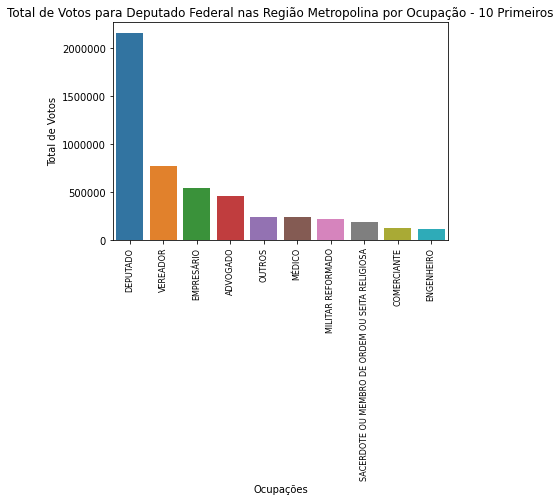

In [30]:
# Elaborando um gráfico para as profissões
sns.barplot(data = profi_deputados_federais, x = 'DS_OCUPACAO', y = 'QT_VOTOS')
plt.ticklabel_format(style='plain', axis='y') # Tirando notação cientifica do eixo y
plt.xlabel('Ocupações')
plt.ylabel('Total de Votos')
plt.title('Total de Votos para Deputado Federal nas Região Metropolina por Ocupação - 10 Primeiros')
plt.xticks(rotation = 90, size = 8)


In [31]:
# Deputados Federais Mais Votados na baixada
votos_proporcionais_fed_top = votos_proporcionais_fed[['NM_CANDIDATO', 'QT_VOTOS']] # Separando as informações
# Com dados de Votos Nulos
votos_proporcionais_fed_top = votos_proporcionais_fed_top.groupby(['NM_CANDIDATO'], dropna=False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending=False)
votos_proporcionais_fed_top=votos_proporcionais_fed_top.head(10)
votos_proporcionais_fed_top['porcentagem'] = round(votos_proporcionais_fed_top['QT_VOTOS'] / votos_proporcionais_fed_top['QT_VOTOS'].sum()*100,2)
votos_proporcionais_fed_top

,NM_CANDIDATO,QT_VOTOS,porcentagem
1052,NaN,1227809,48.68
237,DANIELA MOTÉ DE SOUZA CARNEIRO,172962,6.86
976,TALÍRIA PETRONE SOARES,170688,6.77
279,EDUARDO PAZUELLO,165518,6.56
617,LUIZ ANTONIO DE SOUZA TEIXEIRA JUNIOR,160820,6.38
980,TARCÍSIO MOTTA DE CARVALHO,147693,5.86
52,ALTINEU CORTES FREITAS COUTINHO,127529,5.06
791,OTONI MOURA DE PAULO JUNIOR,118875,4.71
629,LUIZ LINDBERGH FARIAS FILHO,118793,4.71
418,GUTEMBERG REIS DE OLIVEIRA,111443,4.42


Text(0.5, 1.0, 'Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022')

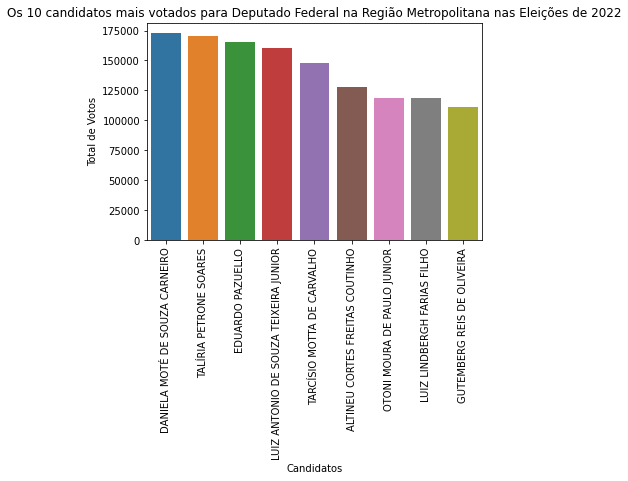

In [32]:
sns.barplot(data = votos_proporcionais_fed_top, x = 'NM_CANDIDATO', y = 'QT_VOTOS')
plt.xticks(rotation = 90)
plt.xlabel('Candidatos')
plt.ylabel('Total de Votos')
plt.title('Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022')


Text(0.5, 1.0, 'Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022 - Com votos Nulos (%)')

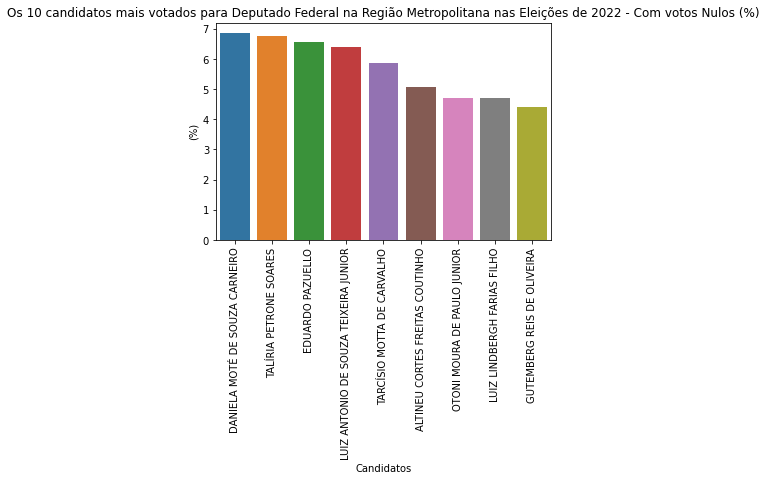

In [33]:
sns.barplot(data = votos_proporcionais_fed_top, x = 'NM_CANDIDATO', y = 'porcentagem')
plt.xticks(rotation = 90)
plt.xlabel('Candidatos')
plt.ylabel('(%)')
plt.title('Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022 - Com votos Nulos (%)')

In [34]:
# Votos por Partido para deputados federais
votos_proporcionais_fed_partido = votos_proporcionais_fed[['SG_PARTIDO', 'QT_VOTOS']]
votos_proporcionais_fed_partido = votos_proporcionais_fed_partido.groupby(['SG_PARTIDO'], dropna=False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending=False) # Agrupando os dados
# Criando a porcentagem
votos_proporcionais_fed_partido['porcentagem'] = round(votos_proporcionais_fed_partido['QT_VOTOS'] / votos_proporcionais_fed_partido['QT_VOTOS'].sum()*100,2)

In [35]:
# Olhando so dados
# Filtrando para os 10 mais
votos_proporcionais_fed_partido = votos_proporcionais_fed_partido.head(10)
votos_proporcionais_fed_partido

,SG_PARTIDO,QT_VOTOS,porcentagem
11,PL,1245116,16.80
31,NaN,1227809,16.57
30,UNIÃO,615970,8.31
22,PSOL,580606,7.83
24,PT,519991,7.02
20,PSD,517366,6.98
28,REPUBLICANOS,392167,5.29
15,PP,366267,4.94
4,MDB,314733,4.25
10,PDT,166738,2.25


Text(0.5, 1.0, 'Porcentagem de Votos para Deputados Federais na Região Metropolitana do Rio de Janeiro por Partido em 2022')

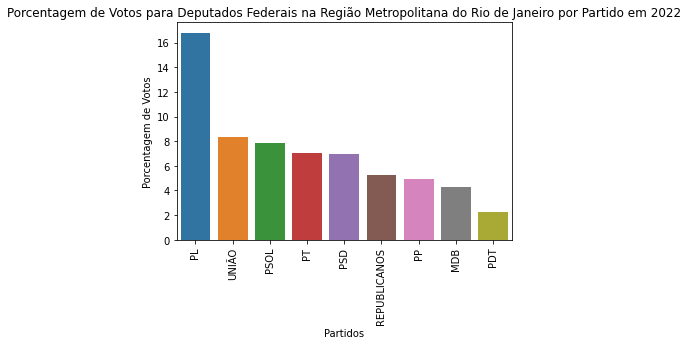

In [36]:
# Produzindo grafico de partidos
sns.barplot(data = votos_proporcionais_fed_partido, x = "SG_PARTIDO", y = 'porcentagem')
plt.xticks(rotation = 90)
plt.xlabel('Partidos')
plt.ylabel('Porcentagem de Votos')
plt.title('Porcentagem de Votos para Deputados Federais na Região Metropolitana do Rio de Janeiro por Partido em 2022')


* NA somavam 16,57% de Valores Nulos
* PL teve 16 % dos votos para Deputado Estadual

* Candidatos que tentam a reeleição são os mais votados?

In [37]:
# Reeleição
# Agrupando
votos_proporcionais_fed_reeleicao = votos_proporcionais_fed[['ST_REELEICAO', 'QT_VOTOS']]
votos_proporcionais_fed_reeleicao = votos_proporcionais_fed_reeleicao.groupby(['ST_REELEICAO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)

In [38]:
votos_proporcionais_fed_reeleicao

,ST_REELEICAO,QT_VOTOS
0,N,4357934
1,S,1826256


In [39]:
# Criando porcentagem para informações de Reeleição 
votos_proporcionais_fed_reeleicao['porcentagem'] = round(votos_proporcionais_fed_reeleicao['QT_VOTOS'] / votos_proporcionais_fed_reeleicao['QT_VOTOS'].sum()*100,2)

In [40]:
# Olhando os dados de Reeleição novamente
votos_proporcionais_fed_reeleicao

,ST_REELEICAO,QT_VOTOS,porcentagem
0,N,4357934,70.47
1,S,1826256,29.53


* 70,47 % dos votos foram para candidatos que não tentam reeleição na Região Metropolitana do Rio de Janeiro

#### Deputados Estaduais

In [41]:
# Criando a base para ver os votos para deputados Estaduais
votos_proporcionais_est = votos_proporcionais.query("DS_CARGO_x == 'DEPUTADO ESTADUAL'")
votos_proporcionais_est['DS_CARGO_x'].unique()

array(['DEPUTADO ESTADUAL'], dtype=object)

##### Candidatos Estaduais mais votados

In [42]:
votos_proporcionais_est_cand = votos_proporcionais_est[['NM_CANDIDATO', 'QT_VOTOS']] # Filtrado para somente estes parametros
votos_proporcionais_est_cand = votos_proporcionais_est_cand.groupby(['NM_CANDIDATO'], dropna = False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
votos_proporcionais_est_cand

,NM_CANDIDATO,QT_VOTOS
1607,NaN,1421731
412,DOUGLAS RUAS DOS SANTOS,173696
1011,MARCIO CORREIA DE OLIVEIRA,160358
1284,RENATA DA SILVA SOUZA,157037
1391,ROSENVERG REIS DE OLIVEIRA,115376
...,...,...
1392,ROSIANE DE ALVARENGA VALERIO,2
236,BRUNO FERREIRA COUTO,2
1581,WELLINGTON FERNANDES BARROS DA SILVA,1
950,LUZIA ESPERANÇA DE JESUS RODRIGUES,1


In [43]:
# Mostrando apenas os 10 mais votados
votos_proporcionais_est_cand = votos_proporcionais_est_cand.head(10)
votos_proporcionais_est_cand

,NM_CANDIDATO,QT_VOTOS
1607,NaN,1421731
412,DOUGLAS RUAS DOS SANTOS,173696
1011,MARCIO CORREIA DE OLIVEIRA,160358
1284,RENATA DA SILVA SOUZA,157037
1391,ROSENVERG REIS DE OLIVEIRA,115376
619,GUILHERME JANDRE DELAROLI,103988
1500,THIAGO GAGLIASSO ONOFRE FERREIRA,86581
606,GISELLE LOUISE MONTEIRO DE OLIVEIRA,85741
466,ELIKA TAKIMOTO,77920
378,DANNIEL LIBRELON DIAS DE CASTRO,69276


Text(0.5, 1.0, 'Os 10 Candidatos a Deputado Estadual mais votados na Região Metropolitana do Rio de Janeiro nas Eleições de 2022')

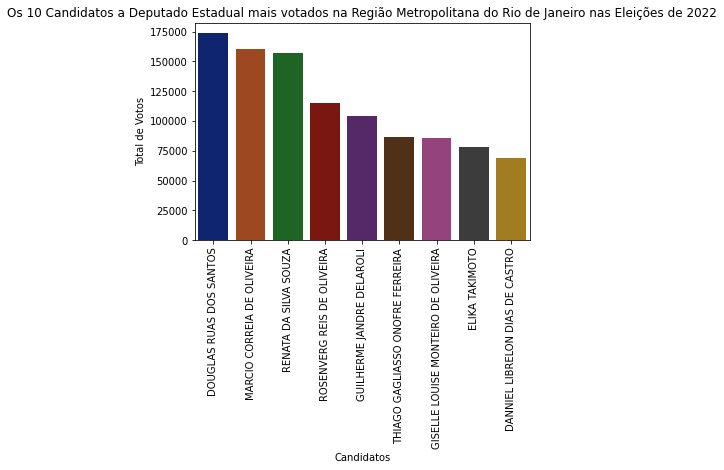

In [44]:
# Plotando Grafico simples
sns.barplot(data = votos_proporcionais_est_cand, x = 'NM_CANDIDATO', y = 'QT_VOTOS', palette='dark')
plt.xlabel('Candidatos')
plt.ylabel('Total de Votos')
plt.xticks(rotation = 90)
plt.title('Os 10 Candidatos a Deputado Estadual mais votados na Região Metropolitana do Rio de Janeiro nas Eleições de 2022')

In [45]:
# Analise por Partido
votos_proporcionais_est_partido = votos_proporcionais_est[['SG_PARTIDO', 'QT_VOTOS']]
votos_proporcionais_est_partido = votos_proporcionais_est_partido.groupby(['SG_PARTIDO'], dropna = False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)

In [46]:
# Criando a porcentagem
votos_proporcionais_est_partido['porcentagem'] = round(votos_proporcionais_est_partido['QT_VOTOS'] / votos_proporcionais_est_partido['QT_VOTOS'].sum()*100,2)
# Selecionando somente os 10 partidos mais votados
votos_proporcionais_est_partido = votos_proporcionais_est_partido.head(10)
votos_proporcionais_est_partido

,SG_PARTIDO,QT_VOTOS,porcentagem
32,NaN,1421731,19.18
11,PL,1220022,16.46
30,UNIÃO,622310,8.40
20,PSD,499484,6.74
24,PT,487355,6.58
22,PSOL,428410,5.78
15,PP,286985,3.87
28,REPUBLICANOS,243673,3.29
4,MDB,237931,3.21
29,SOLIDARIEDADE,237438,3.20


* NA são 19,18% dos votos para Deputado Federal na Região Metropolitana do Rio de Janeiro
* PL teve 16,46 % do para Deputado Federal na Região Metropolitana do Rio de Janeiro

Text(0.5, 1.0, 'Porcentagem de Votos para Deputado Estadual por Partido na Região Metropolitana nas Eleições de 2022')

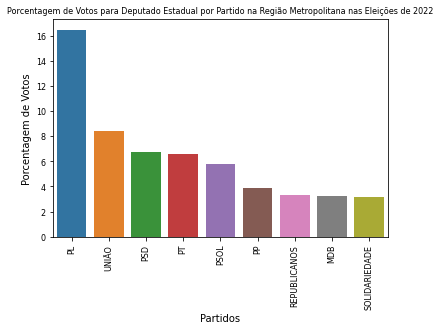

In [47]:
# Plotando um mapa de partidos mais votados para Deputados Estadual na Região Metropolitana do Rio de Janeiro - Top 10
sns.barplot(data = votos_proporcionais_est_partido, x = 'SG_PARTIDO', y = 'porcentagem')
plt.xticks(rotation = 90)
plt.xlabel('Partidos')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.ylabel('Porcentagem de Votos')
plt.title('Porcentagem de Votos para Deputado Estadual por Partido na Região Metropolitana nas Eleições de 2022', size = 8)

* PL 27,20 % dos votos de DEPUTADO FEDERAL na Região Metropolitana são do PL

###### Deputados Estaduais RM na por cor e Genero

In [48]:
votos_proporcionais_est_cor_gen = votos_proporcionais_est[['DS_COR_RACA', 'DS_GENERO', 'QT_VOTOS' ]]
votos_proporcionais_est_cor_gen['QT_VOTOS'].sum()

7411999

In [49]:
# Agrupando os dados
votos_proporcionais_est_cor_gen = votos_proporcionais_est_cor_gen.groupby(['DS_COR_RACA', 'DS_GENERO'], dropna = False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
votos_proporcionais_est_cor_gen['porcentagem'] = round(votos_proporcionais_est_cor_gen['QT_VOTOS'] / votos_proporcionais_est_cor_gen['QT_VOTOS'].sum()*100,2)
votos_proporcionais_est_cor_gen

,DS_COR_RACA,DS_GENERO,QT_VOTOS,porcentagem
3,BRANCA,MASCULINO,3260814,43.99
12,NaN,NaN,1421731,19.18
9,PARDA,MASCULINO,887053,11.97
10,PRETA,FEMININO,475715,6.42
11,PRETA,MASCULINO,465783,6.28
2,BRANCA,FEMININO,407000,5.49
8,PARDA,FEMININO,296845,4.00
0,AMARELA,FEMININO,77920,1.05
4,INDÍGENA,FEMININO,57862,0.78
6,NÃO INFORMADO,FEMININO,34582,0.47


* Total de Votos em Homens Brancos para deputado Estadual é de 43,99%
* Total de votos em Negros é de 28,67% % para Deputados Estaduais -- 3,67% a mais que o percentual em deputados Federais
* Mulheres pretas Receberam 12,9% dos votos para Deputados Estaduais
* Indigenas Receberam 0,98% dos Votos para Deputados Estaduais

### Votos Gerais para Deputados

#### Genero cor

In [50]:
votos_proporcionais_cor_gen = votos_proporcionais[['DS_GENERO', 'DS_COR_RACA', 'QT_VOTOS']]
votos_proporcionais_cor_gen = votos_proporcionais_cor_gen.groupby(['DS_GENERO', 'DS_COR_RACA'], dropna = False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)

In [51]:
# Porcentagem de Votos
votos_proporcionais_cor_gen['porcentagem'] = round(votos_proporcionais_cor_gen['QT_VOTOS'] / votos_proporcionais_cor_gen['QT_VOTOS'].sum()*100,2)
votos_proporcionais_cor_gen

,DS_GENERO,DS_COR_RACA,QT_VOTOS,porcentagem
7,MASCULINO,BRANCA,6669157,44.99
12,NaN,NaN,2649540,17.87
10,MASCULINO,PARDA,1689721,11.40
1,FEMININO,BRANCA,1193942,8.05
5,FEMININO,PRETA,925086,6.24
11,MASCULINO,PRETA,875090,5.90
4,FEMININO,PARDA,488531,3.30
9,MASCULINO,NÃO INFORMADO,129031,0.87
0,FEMININO,AMARELA,77920,0.53
2,FEMININO,INDÍGENA,62425,0.42


In [58]:
# Somando porcentagem de votos femininos
votos_proporcionais_cor_gen.query("DS_GENERO == 'FEMININO'").sum()

DS_GENERO      FEMININOFEMININOFEMININOFEMININOFEMININOFEMININO
DS_COR_RACA        BRANCAPRETAPARDAAMARELAINDÍGENANÃO INFORMADO
QT_VOTOS                                                2809221
porcentagem                                               18.95
dtype: object

In [60]:
# Porcentagem de votos de mulheres negras
votos_proporcionais_cor_gen.query("DS_GENERO == ('FEMININO') & DS_COR_RACA == ('PRETA', 'PARDA')").sum()

DS_GENERO      FEMININOFEMININO
DS_COR_RACA          PRETAPARDA
QT_VOTOS                1413617
porcentagem                9.54
dtype: object

* 44,99% dos Votos para Deputados (Estaduais e Federais) são em Homens Brancos
* 17,87 % dos Votos são Nulos
* Votos na População Negra (Pretos e Pardos) somam  26,84%
* Mulheres Negras tem 9,54% dos votos
* Indigenas tem 0,42 % dos Votos

#### Ocupação dos Deputados

In [52]:
votos_proporcionais_ocupacao = votos_proporcionais[['DS_OCUPACAO', 'QT_VOTOS']]
votos_proporcionais_ocupacao = votos_proporcionais_ocupacao.groupby(['DS_OCUPACAO'], dropna = False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
# Criando a porcentagem
votos_proporcionais_ocupacao['porcentagem'] = round(votos_proporcionais_ocupacao['QT_VOTOS'] / votos_proporcionais_ocupacao['QT_VOTOS'].sum()*100,2)
votos_proporcionais_ocupacao

,DS_OCUPACAO,QT_VOTOS,porcentagem
40,DEPUTADO,3825753,25.81
141,NaN,2649540,17.87
138,VEREADOR,1322966,8.92
51,EMPRESÁRIO,1245696,8.40
89,OUTROS,883506,5.96
...,...,...,...
109,RECEPCIONISTA,45,0.00
15,ARTISTA PLÁSTICO E ASSEMELHADOS,41,0.00
125,TRABALHADOR METALÚRGICO E SIDERÚRGICO,34,0.00
93,PESCADOR,25,0.00


* 34,73 % dos votos foram para Candidatos que já tem uma cadeira ou na Camara de Vereadores ou na Assembléia Legislativa

In [53]:
votos_proporcionais.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO_x',
       'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO_y', 'NM_CANDIDATO',
       'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO'],
      dtype='object')

In [54]:
votos_proporcionais_partido = votos_proporcionais[['SG_PARTIDO', 'QT_VOTOS']]
votos_proporcionais_partido = votos_proporcionais_partido.groupby(['SG_PARTIDO'], dropna= False).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
votos_proporcionais_partido['porcentagem'] = round(votos_proporcionais_partido['QT_VOTOS'] / votos_proporcionais_partido['QT_VOTOS'].sum()*100,2)
votos_proporcionais_partido.head() # 5 Primeiros

,SG_PARTIDO,QT_VOTOS,porcentagem
32,NaN,2649540,17.87
11,PL,2465138,16.63
30,UNIÃO,1238280,8.35
20,PSD,1016850,6.86
22,PSOL,1009016,6.81


* Votos nulos totalizaram 17,87 % dos votos
* PL recebeu 16,63 % dos Votos
* PSOL é o partido de Esquerda com mais votos na Região Metropolitana nas Alas Proporcionais (DEPUTADOS) com 6,81%